# Project Part 1


[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/Matthew-Bustamante/CS39AA-Project-Cyberbullying/blob/main/project_part1.ipynb)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Matthew-Bustamante/CS39AA-Project-Cyberbullying/blob/main/project_part1.ipynb)

## 1. Introduction/Background



Cyberbullying is a huge problem in the social media space. Due to social media's ubiquity means that cyberbullying can happen anytime, anywhere, and is anonomoyous which means that cyberbullying can be a more effective form of bullying.  This dataset contains about 11099 unique tweets, and is binary as the data is sorted into cyberbullying and non-cyberbullying.


The NLP problem this data set is trying to solve is to identitfy and predict if tweet is potentially harmful and flag it as cyberbullying or non-cyberbullying. This problem is a text classification problem because it's taking a tweet which is our X and classifiying it as cyberbullying or non-cyberbullying

What I plan to do for this project is to build a baseline model to better understand the dataset, and then use an exisiting NLP model and fine tune it to get it as accurate as possible.  I have noticed that some models are pretty low in accuracy using this dataset and I want to try to improve that, as well as learn why accuracies for this dataset are low and what are the challenges for trying to learn hateful comments.

## 2. Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
import os
# ...
#to list the directory for the input data
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv


Here we are reading the csv file and here you can look at what the data looks like, we can see that the data is given a number 0 or 1.  A 1 indicates that the tweet is cyberbullying and a 0 indicates that the tweet is non-cyberbullying

In [2]:
#input_data_path = https://raw.githubusercontent.com/sgeinitz/CS39AA/main/data/trainB1.csv
#input_data_path = 'https://raw.githubusercontent.com/Matthew-Bustamante/CS39AA-Project-Cyberbullying/main/CyberBullying_Comments_Dataset.csv'
input_data_path = 'https://raw.githubusercontent.com/Matthew-Bustamante/CS39AA-Project-Cyberbullying/main/CyberBullying_Comments_Dataset.csv'
cyberBullying = pd.read_csv(input_data_path, nrows=10000)
cyberBullying.head(3)

,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0


Lets look at how many characters are in these tweets

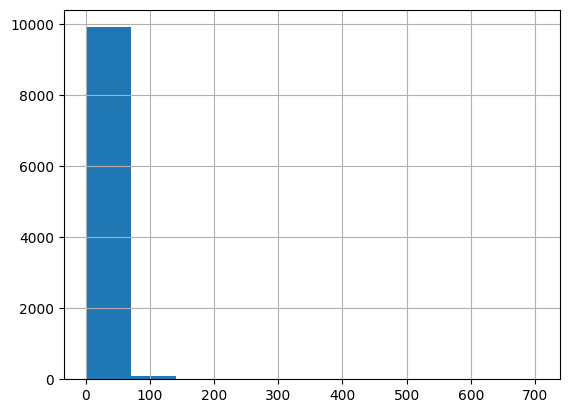

In [3]:
#cyberBullying['tweet_text'].map(lambda x: len(x)).hist()

"""
A method that takes in the dataset and divides up the words into characters and plots the frequecny
of each character to a histogram
"""
def wordNumberHistogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
    
wordNumberHistogram(cyberBullying['Text'])

We can see that majority of these tweets fall between 1 and 70 characters which makes sense as tweets are suppose to be short and concise

Next, Let's see how many words are in each tweet

<Axes: >

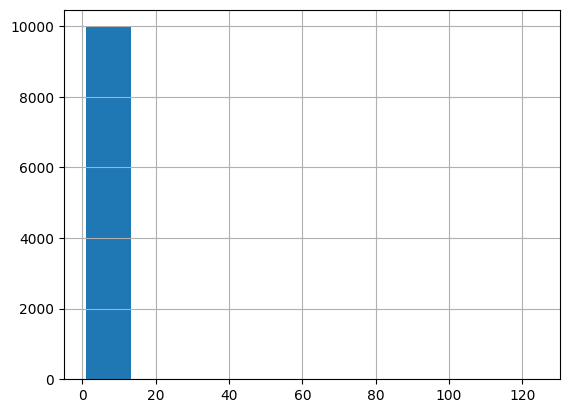

In [4]:
cyberBullying['Text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

The majority of these tweets contain about 1 to 15 words which makes sense as tweets are usually short and consise compared to other text.

Let's now see how many stopwords this data set has

Stop words are commonly used words that are in a language and it's important to filter them out from less commonly used words so that you can access the least commonly used words. 

Here we want to see how many stop words are used in these tweets

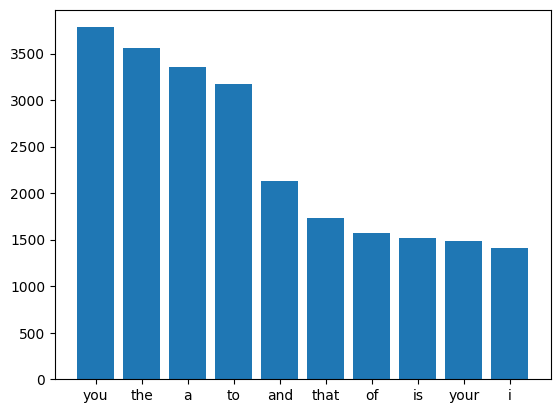

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

"""
a method that takes in text from the data set and checks if the text has stops words 
if so then it adds it to a dictionary. After the entire dataset is read the method then
Plots the dictionary with all of the stopwords into a bar graph
"""
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(cyberBullying['Text'])

We can see that the top 3 most used stop words words are 'you', 'the', and 'a'.  About 3000 or more tweets contain these words.  

Now that we have the most common words that are in the dataset lets look at the non-stopwords which are the words that least common.  This will help us see what the words that most commonly used that are not stops words like (the, a, to, etc.)


**TRIGGER WARNING**


Some of the words you may see next may contain vulgar words 

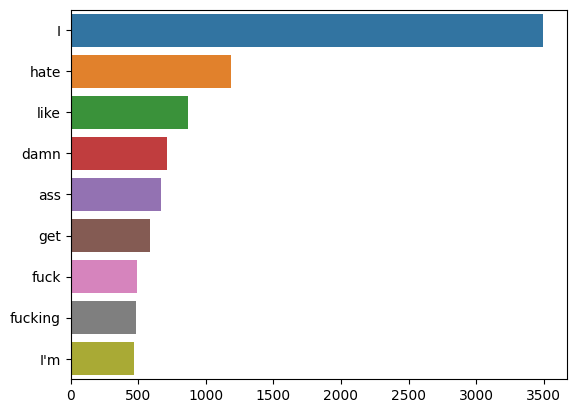

In [6]:
import seaborn as sns
#from nltk.corpus import stopwords
from collections import Counter

"""
A method utilizing a module called counter to search for non-stop words
If the word is not a stop word , the word is appended in a 2D array
At the end a bargraph is made with the 2D array
"""
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
    

plot_top_non_stopwords_barchart(cyberBullying['Text'])

Based on this bar graph we can see that the word "I" is the most common non-stop word with about 3500 tweets containing it.  Next is the word 'hate' that is 1250 tweets.  Interestingly the most used vulguar word is 'ass' and 'damn' (if you count damn as a vulgar word).

Now lets make an ngram to look sequences of words.  The way this will work is that a sequence of words can be n long. For example the sequence 'the three muskteers' would be n = 3 and something like 'you are' would be n = 2.  This will help us to see what the most common sequence of words.  Let's show the sequences for n = 2 and n = 3.

For n = 2: we get the following graph

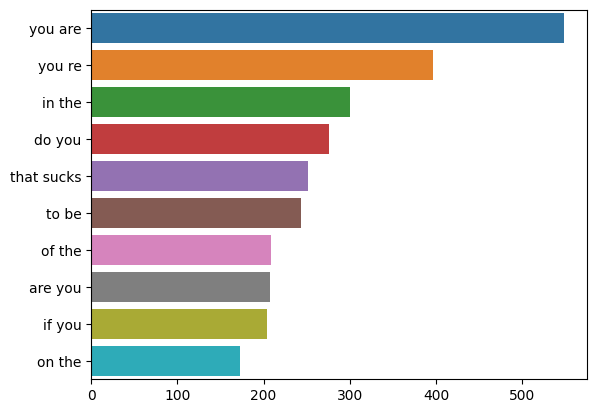

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

"""
Method that plots a barchart for the sequences of words
"""
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    
    """
    Getter to get the top sequences of words based on what n is equal to
    """
    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
plot_top_ngrams_barchart(cyberBullying['Text'],2)

For n = 3 we get the following graph

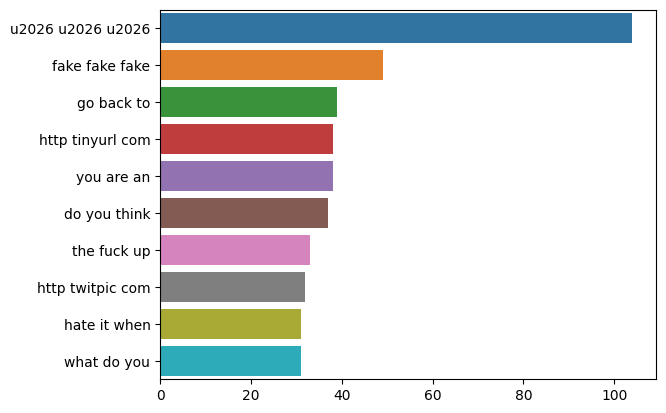

In [8]:
plot_top_ngrams_barchart(cyberBullying['Text'],3)

Now this gives us a better look at some of the tweets look like and the amount of combinations of words that commonly used when n is 2.  We can see the phrase 'you are' is in about 550 tweets and the phrase 'you re' is the second common seen in about 420 tweets.  For n = 3 we can see the sequencec 'u2026 u2026 u2026' is the most used pharse with about 100 tweets containing it.  We can also see when n = 3 that there are urls are in this dataset like 'http tinyurl com' and 'http twitpic com'.  We can also see some potenitally harmful sequences like 'the fuck up' and 'you are an', 'fake fake fake', and even 'go back to' are all potentially harmful sequences of words that we want our model to recognize

By seeing the sequences and non-stop words we can start to see which combinations in this language can contribute to a harmful comment.  We can see that if we combine the sequence 'you are' and the non-stop word 'ass' we can get a potentially harmful comment 'you are ass'. By breaking the data set into stop-words, non-stop-words and sequences we start to recognize patterns in the dataset that can potentially help us train a model to recognize these patterns.